# Digital For Industrial Summative - Part 1
 
## Creating A Digital Thread


A Digital Thread is the one unifying theme or characteristic that connects every aspect of an asset or unit, right from its inception and design, to manufacture, deployment, operations, maintenance to eventual retirement.

In analysis, a digital thread is the logical with which we bind and merge the various data sources into one whole, so that it lends itself to quantitative approaches easily.

<img src = 'images/Digital_Thread.JPG' width=500>


A digital thread is a technique to 'stitch' the data that comes in disjoint tables, such that they can be put together logically. That is a task for this exercise.

Data sets provided:

We have been give 5 data sets, all of which related to one month's worth of readings taken at a live volcano site. The volcano was instrumented with multiple sensors in 10 different geographical points (nodes). Our goal is to combine and merge all of this into one digital thread, making it amenable for analysis.

Tasks:

    1.0 Read all the needed input files
    2.0 Plotting Sensor Time Series
    3.0 Descriptive Analysis One data frame at a time 
    4.0 Creating a Digital Thread from the data sets
    5.0 Time Series based analysis
    6.0 Correlations Analysis
    7.0 Data Manipulations to Merge multiple data sets
    8.0 Building A Battery Remaining-Life prediction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
%matplotlib inline

### 1.0 Read all the needed input files

Create multiple data frames, one to hold each data table.

In [3]:
datapoints = pd.read_csv('data/Volcano/datapoints.csv')
datapoints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176534 entries, 0 to 176533
Data columns (total 4 columns):
id           176534 non-null object
value        63456 non-null float64
timestamp    176534 non-null object
sensor_id    176534 non-null object
dtypes: float64(1), object(3)
memory usage: 5.4+ MB


In [4]:
datapoints

,id,value,timestamp,sensor_id
0,764c5e60-8679-11e6-a353-2f6c041e2491,98.000,2016-08-03 04:39:25+00,7635c920-8679-11e6-a353-2f6c041e2491
1,764c5e61-8679-11e6-a353-2f6c041e2491,33.198,2016-08-03 04:39:25+00,763b9580-8679-11e6-a353-2f6c041e2491
2,764dbdf0-8679-11e6-a353-2f6c041e2491,29.300,2016-08-03 04:39:25+00,763ca6f0-8679-11e6-a353-2f6c041e2491
3,764dbdf1-8679-11e6-a353-2f6c041e2491,96893.110,2016-08-03 04:39:25+00,763d9150-8679-11e6-a353-2f6c041e2491
4,764dbdf2-8679-11e6-a353-2f6c041e2491,459.736,2016-08-03 04:39:25+00,763701a1-8679-11e6-a353-2f6c041e2491
5,76507d10-8679-11e6-a353-2f6c041e2491,64.900,2016-08-03 04:39:25+00,764161e0-8679-11e6-a353-2f6c041e2491
6,76514060-8679-11e6-a353-2f6c041e2491,29.940,2016-08-03 04:47:41+00,763ca6f0-8679-11e6-a353-2f6c041e2491
7,76514061-8679-11e6-a353-2f6c041e2491,459.344,2016-08-03 04:47:41+00,763701a1-8679-11e6-a353-2f6c041e2491
8,76514062-8679-11e6-a353-2f6c041e2491,3.922,2016-08-03 04:47:41+00,763b9580-8679-11e6-a353-2f6c041e2491
9,765251d0-8679-11e6-a353-2f6c041e2491,98.000,2016-08-03 04:47:41+00,7635c920-8679-11e6-a353-2f6c041e2491


In [5]:
datatypes = pd.read_csv('data/Volcano/datatypes.csv')
datatypes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
id         7 non-null object
type       7 non-null object
si_unit    7 non-null object
type_id    7 non-null object
dtypes: object(4)
memory usage: 304.0+ bytes


In [6]:
datatypes

,id,type,si_unit,type_id
0,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA
1,35dcb3c1-8679-11e6-bda3-ef77801087ee,pressure,pascal,PA
2,35dcb3c2-8679-11e6-bda3-ef77801087ee,humidity,relative humidity,HUMA
3,35dcdad0-8679-11e6-bda3-ef77801087ee,carbon dioxide concentration,ppm,GP_CO2
4,35dcdad1-8679-11e6-bda3-ef77801087ee,hydrogen sulfide concentration,ppm,GP_H2S
5,35dcdad2-8679-11e6-bda3-ef77801087ee,battery,percentage,BAT
6,ed5edee0-e701-11e6-83c1-01ce06e6d17f,RSAM,counts,RSAM


In [7]:
nodes = pd.read_csv('data/Volcano/nodes.csv')
nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 8 columns):
id             11 non-null object
name           11 non-null object
description    11 non-null object
location       11 non-null object
status         11 non-null object
created_at     11 non-null object
updated_at     11 non-null object
volcano_id     11 non-null object
dtypes: object(8)
memory usage: 784.0+ bytes


In [8]:
nodes

,id,name,description,location,status,created_at,updated_at,volcano_id
0,c5e39fa0-867a-11e6-a353-2f6c041e2491,N1,\N,\N,OFFLINE,2016-08-17 01:06:49+00,2016-09-29 19:28:05.932+00,35dc3e90-8679-11e6-bda3-ef77801087ee
1,c147ece0-8679-11e6-a353-2f6c041e2491,N9,\N,\N,OFFLINE,2016-08-07 00:51:40+00,2016-09-29 19:41:07.065+00,35dc3e90-8679-11e6-bda3-ef77801087ee
2,76309900-8679-11e6-a353-2f6c041e2491,N8,\N,\N,OFFLINE,2016-08-03 22:09:40+00,2016-09-29 19:20:17.417+00,35dc3e90-8679-11e6-bda3-ef77801087ee
3,762b8ff0-8679-11e6-a353-2f6c041e2491,N10,\N,\N,OFFLINE,2016-08-03 04:39:25+00,2016-09-29 19:20:17.431+00,35dc3e90-8679-11e6-bda3-ef77801087ee
4,c14ccee0-8679-11e6-a353-2f6c041e2491,N2,\N,\N,OFFLINE,2016-08-10 04:20:22+00,2016-09-29 19:20:17.523+00,35dc3e90-8679-11e6-bda3-ef77801087ee
5,d3cbc350-8679-11e6-a353-2f6c041e2491,N3,\N,\N,OFFLINE,2016-08-15 06:10:39+00,2016-10-05 12:42:18.953+00,35dc3e90-8679-11e6-bda3-ef77801087ee
6,762c5340-8679-11e6-a353-2f6c041e2491,N7,\N,\N,OFFLINE,2016-08-03 21:50:32+00,2016-10-07 07:43:05.001+00,35dc3e90-8679-11e6-bda3-ef77801087ee
7,d3ca3cb0-8679-11e6-a353-2f6c041e2491,N4,\N,\N,OFFLINE,2016-08-15 05:22:31+00,2016-10-07 07:43:05.001+00,35dc3e90-8679-11e6-bda3-ef77801087ee
8,d3cb7530-8679-11e6-a353-2f6c041e2491,N5,\N,\N,OFFLINE,2016-08-15 05:31:29+00,2016-10-07 07:43:05.002+00,35dc3e90-8679-11e6-bda3-ef77801087ee
9,ede3ed60-e701-11e6-83c1-01ce06e6d17f,RSAM,\N,\N,OFFLINE,1970-01-17 23:35:31.231+00,2017-01-30 16:24:05.867+00,35dc3e90-8679-11e6-bda3-ef77801087ee


In [9]:
sensors = pd.read_csv('data/Volcano/sensors.csv')
sensors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
id                61 non-null object
description       61 non-null object
data_frequency    61 non-null int64
status            61 non-null object
created_at        61 non-null object
updated_at        61 non-null object
data_type_id      61 non-null object
node_id           61 non-null object
dtypes: int64(1), object(7)
memory usage: 3.9+ KB


In [10]:
sensors

,id,description,data_frequency,status,created_at,updated_at,data_type_id,node_id
0,c15a6370-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-07 00:51:40+00,2016-09-29 19:41:07.066+00,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491
1,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00,2016-09-29 20:13:52.793+00,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
2,763b9580-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00,2016-09-29 20:13:52.797+00,35dcdad1-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
3,763ca6f0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00,2016-09-29 20:13:52.803+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
4,763d9150-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00,2016-09-29 20:13:52.811+00,35dcb3c1-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
5,7636da90-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 21:50:32+00,2016-09-30 18:12:04.577+00,35dcdad0-8679-11e6-bda3-ef77801087ee,762c5340-8679-11e6-a353-2f6c041e2491
6,76413ad0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 22:09:40+00,2016-09-29 20:13:52.818+00,35dcdad2-8679-11e6-bda3-ef77801087ee,76309900-8679-11e6-a353-2f6c041e2491
7,764161e0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00,2016-09-29 20:13:52.82+00,35dcb3c2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
8,c5e685d0-867a-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-17 01:06:49+00,2016-09-29 20:13:52.822+00,35dcdad2-8679-11e6-bda3-ef77801087ee,c5e39fa0-867a-11e6-a353-2f6c041e2491
9,c5e9ba20-867a-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-17 01:06:49+00,2016-09-29 20:13:52.824+00,35dcb3c2-8679-11e6-bda3-ef77801087ee,c5e39fa0-867a-11e6-a353-2f6c041e2491


In [11]:
volcanos = pd.read_csv('data/Volcano/volcanos.csv')
volcanos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 7 columns):
id             1 non-null object
name           1 non-null object
description    1 non-null object
location       1 non-null object
status         1 non-null object
created_at     1 non-null object
updated_at     1 non-null object
dtypes: object(7)
memory usage: 136.0+ bytes


In [12]:
volcanos

,id,name,description,location,status,created_at,updated_at
0,35dc3e90-8679-11e6-bda3-ef77801087ee,Masaya,"This is the world's biggest, baddest, most evi...","{11.985318299999999,-86.178342900000004}",OFFLINE,2016-09-29 19:16:23.419+00,2016-10-07 07:43:05.015+00


Convert all Data frame time stamps into date-time format, so that time-based indexing is possible

In [13]:
data_dir = 'data/Volcano'

In [14]:
_files = os.listdir(data_dir)

### 2. Plotting Sensor Time Series

Create separate plots for each sensor in the dataset. Store each one in a separate file.

**What (if anything) can we tell about the various sensors from the plots?**


In [15]:
datapoints.head()

,id,value,timestamp,sensor_id
0,764c5e60-8679-11e6-a353-2f6c041e2491,98.000,2016-08-03 04:39:25+00,7635c920-8679-11e6-a353-2f6c041e2491
1,764c5e61-8679-11e6-a353-2f6c041e2491,33.198,2016-08-03 04:39:25+00,763b9580-8679-11e6-a353-2f6c041e2491
2,764dbdf0-8679-11e6-a353-2f6c041e2491,29.300,2016-08-03 04:39:25+00,763ca6f0-8679-11e6-a353-2f6c041e2491
3,764dbdf1-8679-11e6-a353-2f6c041e2491,96893.110,2016-08-03 04:39:25+00,763d9150-8679-11e6-a353-2f6c041e2491
4,764dbdf2-8679-11e6-a353-2f6c041e2491,459.736,2016-08-03 04:39:25+00,763701a1-8679-11e6-a353-2f6c041e2491


In [16]:
datapoints = datapoints.convert_objects(convert_numeric=True)
datapoints['timestamp'] = pd.to_datetime(datapoints['timestamp'], errors='coerce')
datapoints = datapoints.dropna(subset=['timestamp'])

C:\Users\212599233\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [17]:
datapoints.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176534 entries, 0 to 176533
Data columns (total 4 columns):
id           176534 non-null object
value        63456 non-null float64
timestamp    176534 non-null datetime64[ns]
sensor_id    176534 non-null object
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 6.7+ MB


In [18]:
datapoints.isnull().sum()

id                0
value        113078
timestamp         0
sensor_id         0
dtype: int64

In [19]:
datapoints.dropna(inplace=True)

In [20]:
store = datapoints.groupby(datapoints['sensor_id']).agg({'count'})

In [21]:
store.head()

,id,value,timestamp
,count,count,count
sensor_id,,,
1248ff60-e707-11e6-89c8-314aa4f67f8c,8816,8816,8816
7635c920-8679-11e6-a353-2f6c041e2491,935,935,935
7635f030-8679-11e6-a353-2f6c041e2491,4831,4831,4831
7636da90-8679-11e6-a353-2f6c041e2491,1009,1009,1009
763701a0-8679-11e6-a353-2f6c041e2491,1007,1007,1007


In [22]:
store.reset_index(level=0, inplace=True)

In [23]:
store.head()

,sensor_id,id,value,timestamp
,,count,count,count
0,1248ff60-e707-11e6-89c8-314aa4f67f8c,8816,8816,8816
1,7635c920-8679-11e6-a353-2f6c041e2491,935,935,935
2,7635f030-8679-11e6-a353-2f6c041e2491,4831,4831,4831
3,7636da90-8679-11e6-a353-2f6c041e2491,1009,1009,1009
4,763701a0-8679-11e6-a353-2f6c041e2491,1007,1007,1007


In [24]:
l = store['sensor_id'].tolist()

In [25]:
l

['1248ff60-e707-11e6-89c8-314aa4f67f8c',
 '7635c920-8679-11e6-a353-2f6c041e2491',
 '7635f030-8679-11e6-a353-2f6c041e2491',
 '7636da90-8679-11e6-a353-2f6c041e2491',
 '763701a0-8679-11e6-a353-2f6c041e2491',
 '763701a1-8679-11e6-a353-2f6c041e2491',
 '763b9580-8679-11e6-a353-2f6c041e2491',
 '763bbc90-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763d6a40-8679-11e6-a353-2f6c041e2491',
 '763d9150-8679-11e6-a353-2f6c041e2491',
 '76402960-8679-11e6-a353-2f6c041e2491',
 '76413ad0-8679-11e6-a353-2f6c041e2491',
 '764161e0-8679-11e6-a353-2f6c041e2491',
 '76427350-8679-11e6-a353-2f6c041e2491',
 '76427351-8679-11e6-a353-2f6c041e2491',
 '7644bd40-8679-11e6-a353-2f6c041e2491',
 '7645ceb0-8679-11e6-a353-2f6c041e2491',
 '7645ceb1-8679-11e6-a353-2f6c041e2491',
 'c159c730-8679-11e6-a353-2f6c041e2491',
 'c159ee40-8679-11e6-a353-2f6c041e2491',
 'c15a6370-8679-11e6-a353-2f6c041e2491',
 'c15a6371-8679-11e6-a353-2f6c041e2491',
 'c15a6372-8679-11e6-a353-2f6c041e2491',
 'c15c5f40-8679-

In [26]:
len(l)   #List extracted from the datapoints dataframe contains 60 sensors

60

In [27]:
sensors.shape #Where there is 61 sensors in the sensors dataframe, 1 sensor data may have contained null values and been deleted by the dropna() above.

(61, 8)

C:\Users\212599233\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\212599233\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


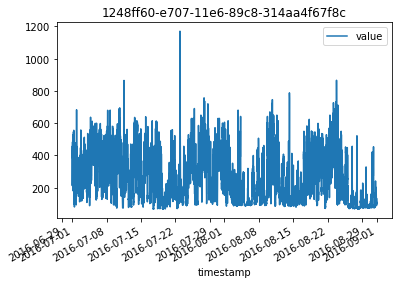

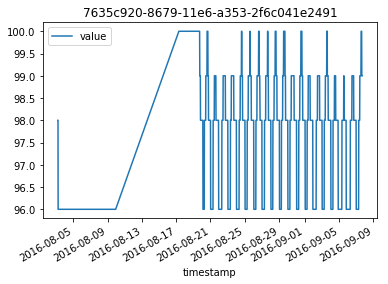

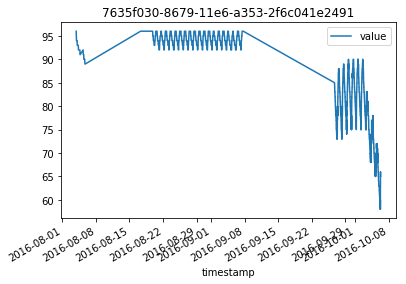

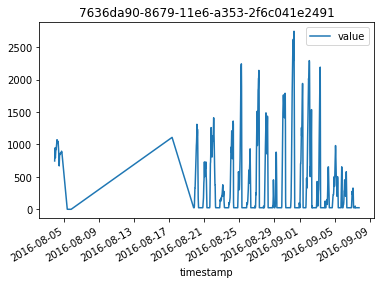

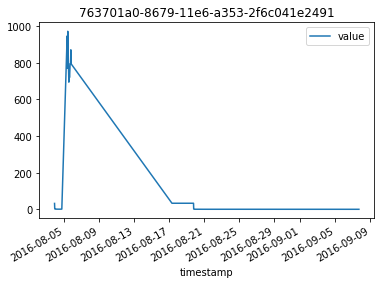

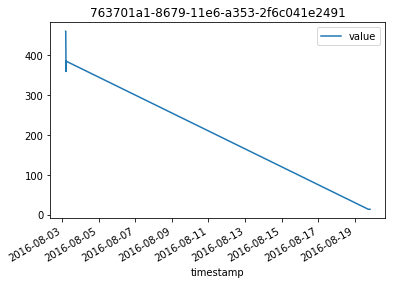

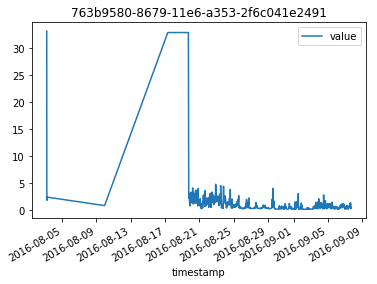

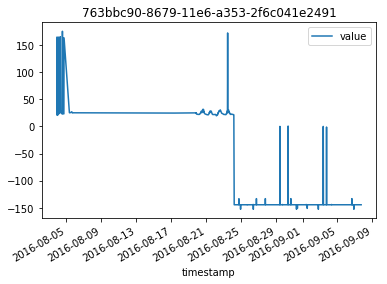

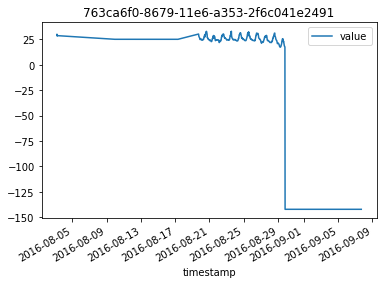

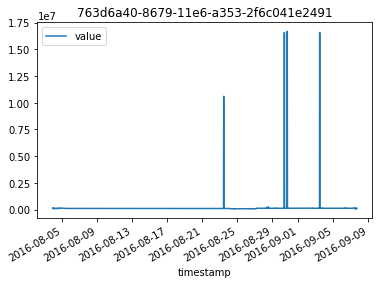

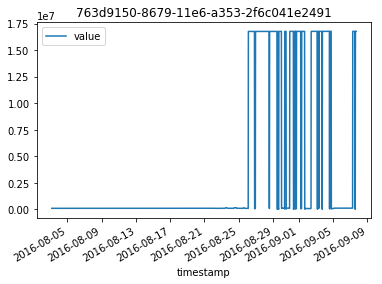

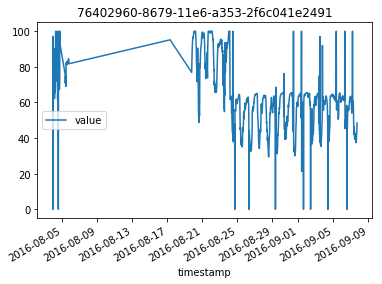

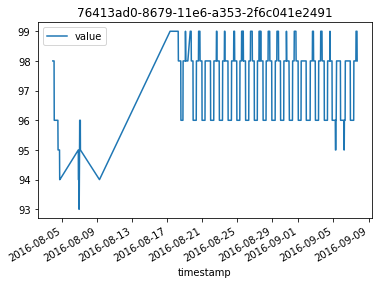

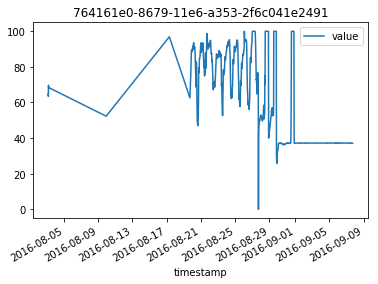

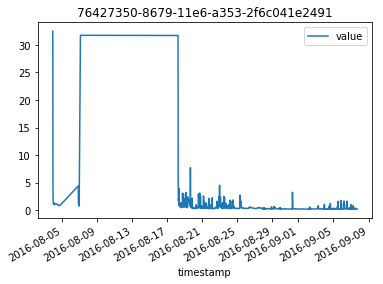

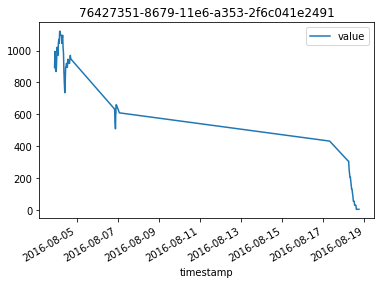

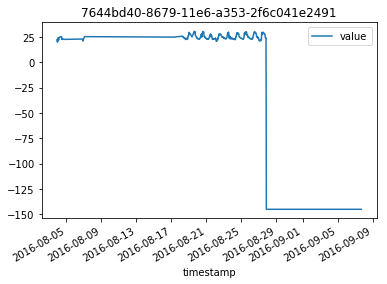

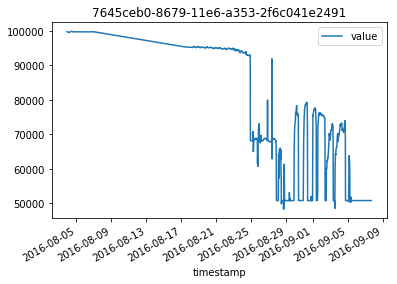

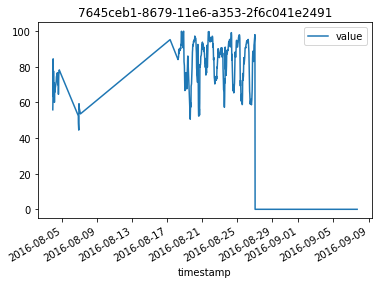

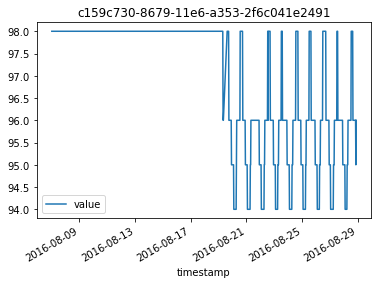

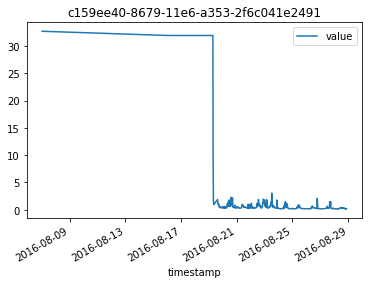

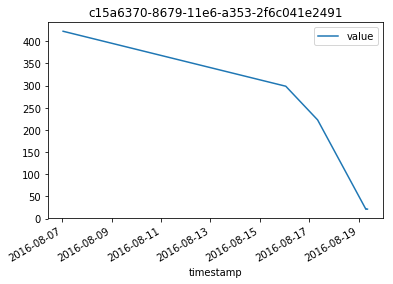

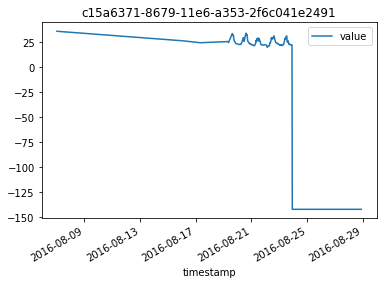

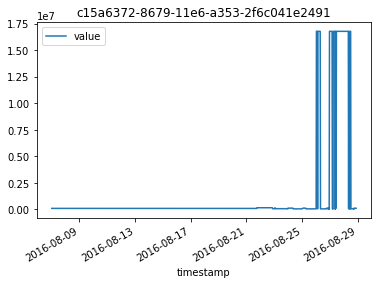

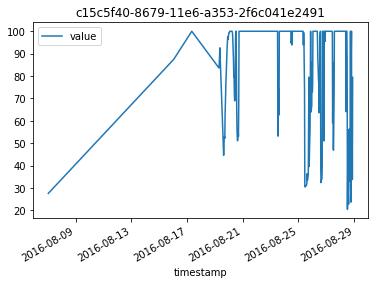

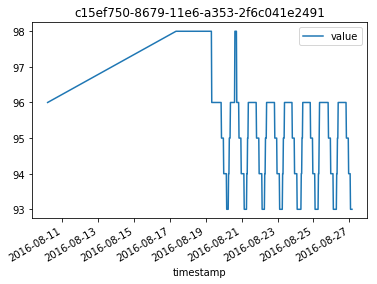

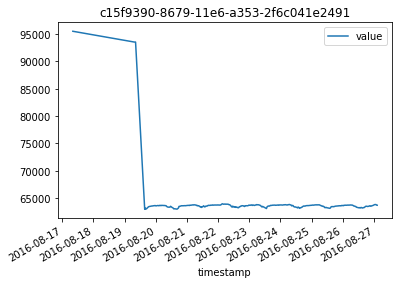

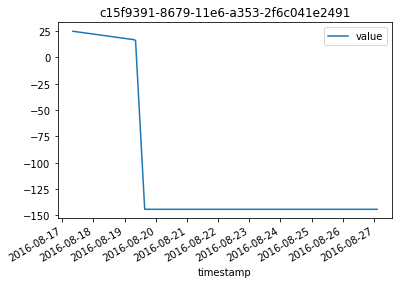

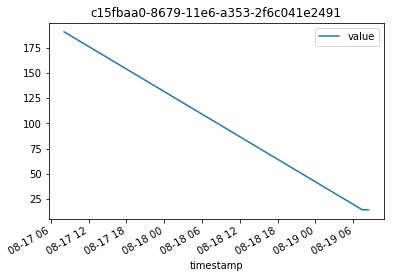

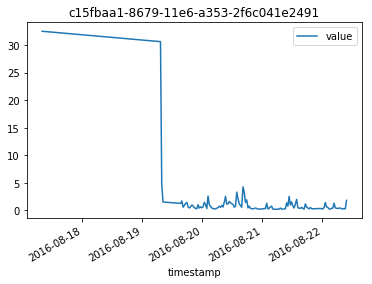

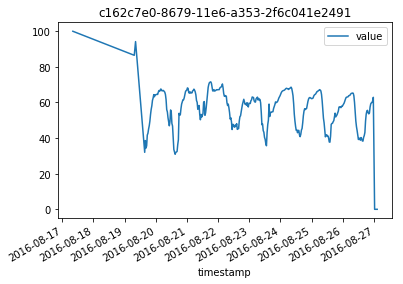

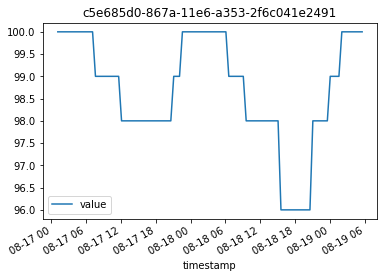

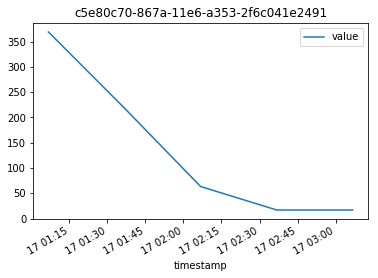

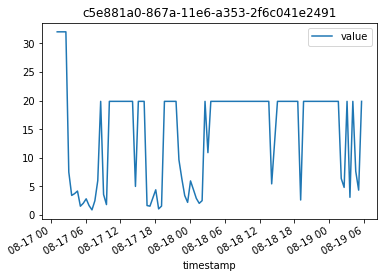

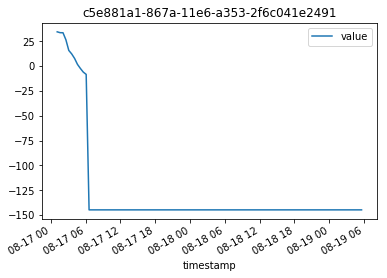

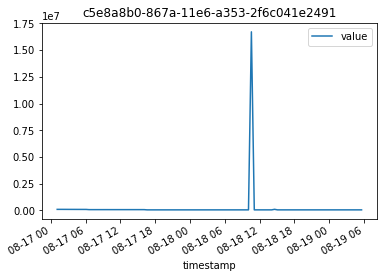

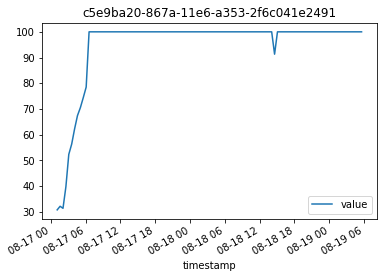

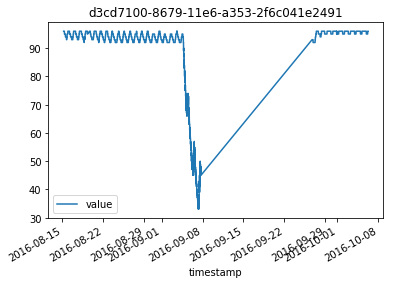

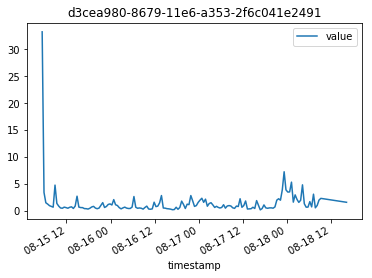

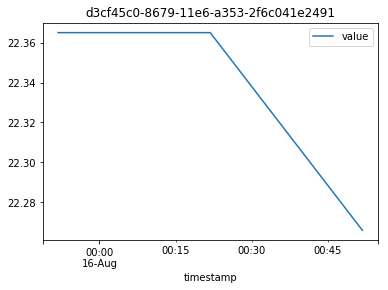

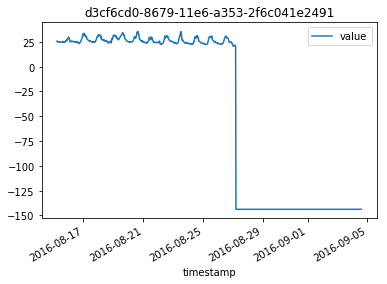

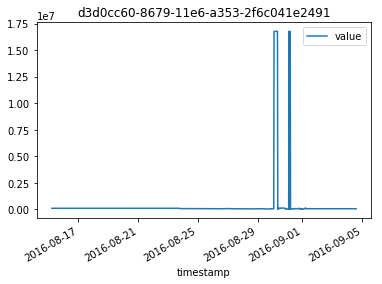

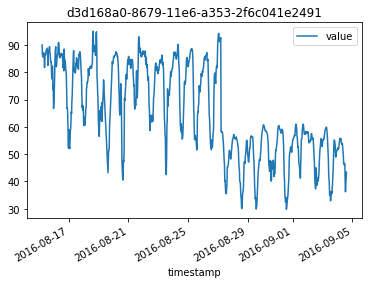

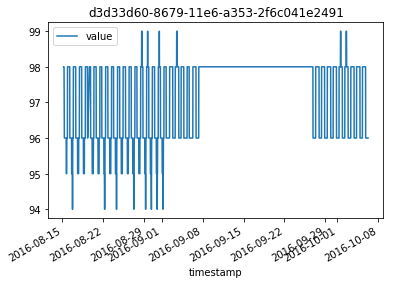

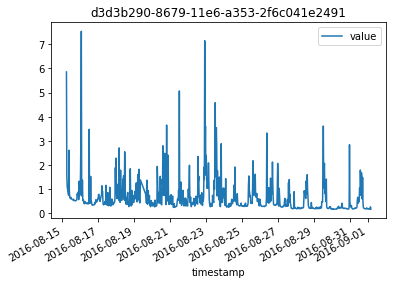

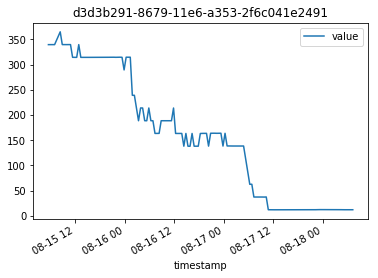

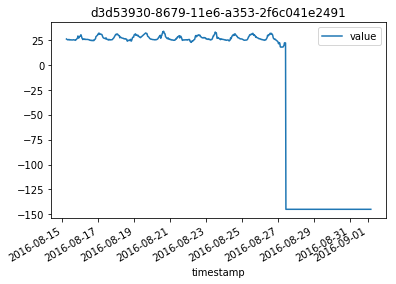

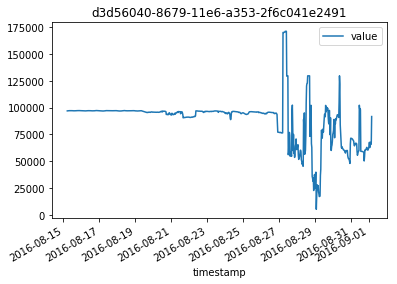

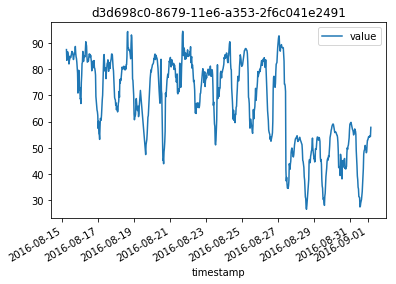

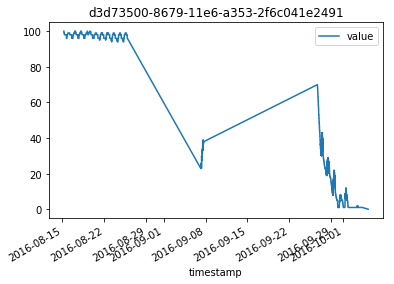

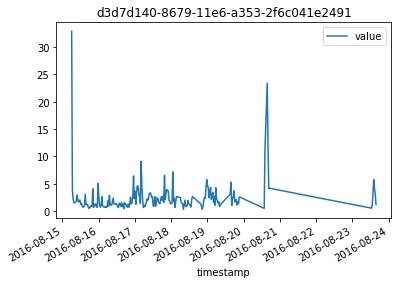

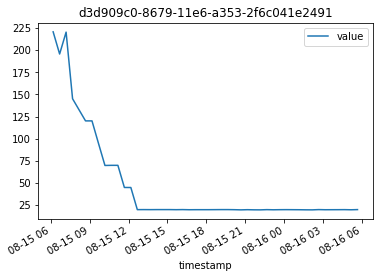

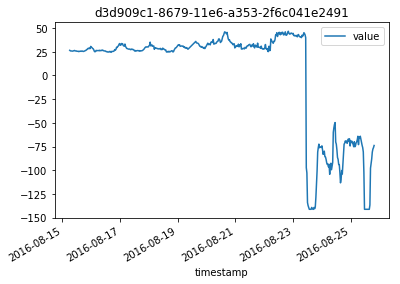

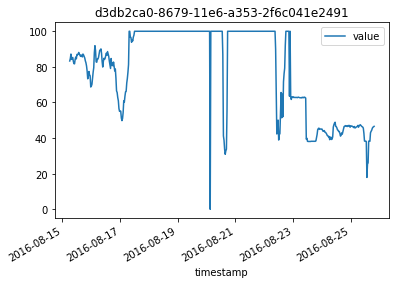

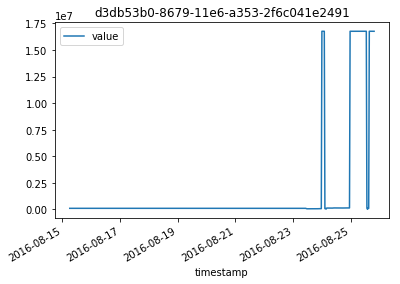

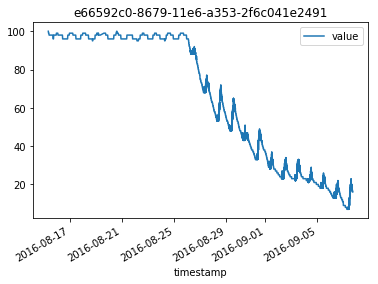

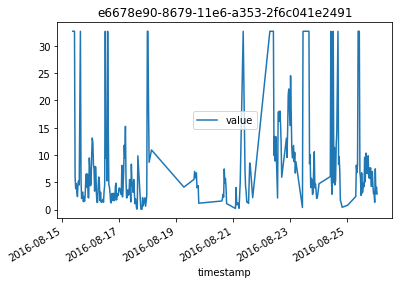

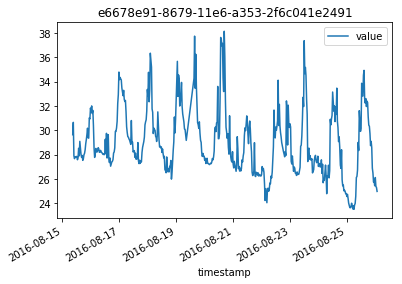

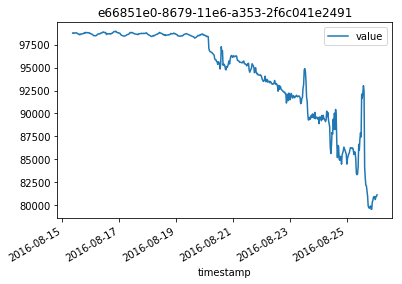

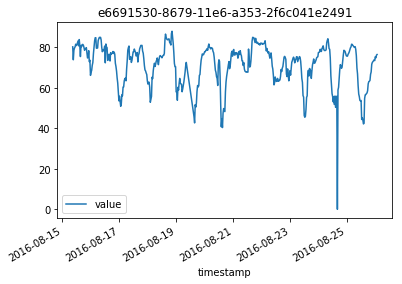

In [28]:
for i in l:
    df = datapoints.loc[datapoints['sensor_id'] == i]
    df.plot(x='timestamp', y='value', title=df.iloc[0]['sensor_id'])


### 3.0 Descriptive Analysis One data frame at a time **

3.1: How many sensors of each type are there?

In [29]:
datatypes.type_id.value_counts()

HUMA      1
BAT       1
GP_CO2    1
RSAM      1
GP_H2S    1
PA        1
TCA       1
Name: type_id, dtype: int64

In [30]:
sensors.groupby(sensors['data_type_id']).agg({'count'})

,id,description,data_frequency,status,created_at,updated_at,node_id
,count,count,count,count,count,count,count
data_type_id,,,,,,,
35dcb3c0-8679-11e6-bda3-ef77801087ee,10,10,10,10,10,10,10
35dcb3c1-8679-11e6-bda3-ef77801087ee,10,10,10,10,10,10,10
35dcb3c2-8679-11e6-bda3-ef77801087ee,10,10,10,10,10,10,10
35dcdad0-8679-11e6-bda3-ef77801087ee,10,10,10,10,10,10,10
35dcdad1-8679-11e6-bda3-ef77801087ee,10,10,10,10,10,10,10
35dcdad2-8679-11e6-bda3-ef77801087ee,10,10,10,10,10,10,10
ed5edee0-e701-11e6-83c1-01ce06e6d17f,1,1,1,1,1,1,1


3.2 Descriptive Analysis 

In [31]:
df = datapoints.loc[datapoints['sensor_id'] == '76402960-8679-11e6-a353-2f6c041e2491']
df.describe()

,value
count,1031.000000
mean,62.675655
std,18.794910
min,0.000000
25%,50.900000
50%,62.200000
75%,68.000000
max,100.000000


In [32]:
for i in l:
    df = datapoints.loc[datapoints['sensor_id'] == i]
    print(i)
    print(df.describe())
    print('\n')

1248ff60-e707-11e6-89c8-314aa4f67f8c
             value
count  8816.000000
mean    261.940903
std     154.505774
min      67.000000
25%     125.000000
50%     225.000000
75%     376.000000
max    1170.000000


7635c920-8679-11e6-a353-2f6c041e2491
            value
count  935.000000
mean    97.750802
std      1.236030
min     96.000000
25%     96.000000
50%     98.000000
75%     99.000000
max    100.000000


7635f030-8679-11e6-a353-2f6c041e2491
             value
count  4831.000000
mean     82.196440
std       8.971274
min      58.000000
25%      75.000000
50%      83.000000
75%      89.000000
max      96.000000


7636da90-8679-11e6-a353-2f6c041e2491
             value
count  1009.000000
mean    383.081140
std     561.729818
min       0.810000
25%      25.050000
50%      50.030000
75%     604.853000
max    2744.429000


763701a0-8679-11e6-a353-2f6c041e2491
             value
count  1007.000000
mean     14.899156
std     108.456375
min       0.120000
25%       0.154000
50%       0.184000

d3d909c0-8679-11e6-a353-2f6c041e2491
            value
count   46.000000
mean    45.462957
std     54.053316
min     19.654000
25%     19.850000
50%     19.899000
75%     38.659000
max    220.710000


d3d909c1-8679-11e6-a353-2f6c041e2491
            value
count  493.000000
mean     2.700832
std     54.721669
min   -141.200000
25%     24.950000
50%     28.070000
75%     32.500000
max     46.590000


d3db2ca0-8679-11e6-a353-2f6c041e2491
            value
count  495.000000
mean    77.760808
std     24.673813
min      0.000000
25%     47.100000
50%     86.900000
75%    100.000000
max    100.000000


d3db53b0-8679-11e6-a353-2f6c041e2491
              value
count  4.990000e+02
mean   1.499872e+06
std    4.631966e+06
min    5.261900e+03
25%    9.700828e+04
50%    9.715502e+04
75%    9.729435e+04
max    1.676476e+07


e66592c0-8679-11e6-a353-2f6c041e2491
             value
count  8848.000000
mean     46.615619
std      25.690425
min       7.000000
25%      24.000000
50%      43.000000
75%     

----

### 4.0 Creating a Digital Thread from the data sets**

**Goal: Merge everything into one wide data table ** 

You have two data frames: `sensors` and `types` Merge each sensors with its type. (Hint: Use `pd.merge()`)

Question: What does this achieve? Why should we do this?

In [33]:
sensors.head()

,id,description,data_frequency,status,created_at,updated_at,data_type_id,node_id
0,c15a6370-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-07 00:51:40+00,2016-09-29 19:41:07.066+00,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491
1,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00,2016-09-29 20:13:52.793+00,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
2,763b9580-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00,2016-09-29 20:13:52.797+00,35dcdad1-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
3,763ca6f0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00,2016-09-29 20:13:52.803+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
4,763d9150-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00,2016-09-29 20:13:52.811+00,35dcb3c1-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491


In [34]:
datatypes.head()

,id,type,si_unit,type_id
0,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA
1,35dcb3c1-8679-11e6-bda3-ef77801087ee,pressure,pascal,PA
2,35dcb3c2-8679-11e6-bda3-ef77801087ee,humidity,relative humidity,HUMA
3,35dcdad0-8679-11e6-bda3-ef77801087ee,carbon dioxide concentration,ppm,GP_CO2
4,35dcdad1-8679-11e6-bda3-ef77801087ee,hydrogen sulfide concentration,ppm,GP_H2S


In [35]:
merge = sensors.merge(datatypes, left_on='data_type_id', right_on='id', how='inner')

Now take the raw `data` data frame and merge it with all the `sensors` and their types.

In [36]:
full = pd.merge(datapoints, merge, left_on='sensor_id', right_on='id_x')

<font color=green> Merging the datasets is a necessary step, for ease of analysis such that all the information about a sensor is known from a single dataframe 
</font>

-----

### 5.0 Time Series based analysis

Now, we are going to take this stitiched data frame and use it for our analysis. Specifically, we are going to perform Time-based analysis on this data.

    Step 1: Take the `full` data frame and make the Time Stamp datetime format
    Step 2: Resample the dataset to the daily level. (One observation per date)
    Step 3: For the resampled data, calculate the daily mean, min and max values for each sensor.

In [37]:
#step1
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63456 entries, 0 to 63455
Data columns (total 16 columns):
id                63456 non-null object
value             63456 non-null float64
timestamp         63456 non-null datetime64[ns]
sensor_id         63456 non-null object
id_x              63456 non-null object
description       63456 non-null object
data_frequency    63456 non-null int64
status            63456 non-null object
created_at        63456 non-null object
updated_at        63456 non-null object
data_type_id      63456 non-null object
node_id           63456 non-null object
id_y              63456 non-null object
type              63456 non-null object
si_unit           63456 non-null object
type_id           63456 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(13)
memory usage: 8.2+ MB


Resample to get daily averages.
Then subset to select the rows you need.

In [38]:
#step2
full.set_index('timestamp', inplace=True)

In [39]:
daily = full[full.type_id=='HUMA']['value'].resample('D')

In [40]:
#Step3
daily.agg(['sum','mean','max'])

,sum,mean,max
timestamp,,,
2016-08-03,1000.1,66.673333,97.2
2016-08-04,5338.9,74.151389,100.0
2016-08-05,1844.8,80.208696,84.6
2016-08-06,479.0,53.222222,59.3
2016-08-07,81.2,40.600000,53.6
2016-08-08,0.0,NaN,NaN
2016-08-09,52.3,52.300000,52.3
2016-08-10,0.0,NaN,NaN
2016-08-11,0.0,NaN,NaN


### 6.0 Correlations Analysis

The next task is to perform a correlation analysis. 

1.  Goal: We want to find all the sensors that are strongly correlated to each other.
2. One of the reasons for doing this is that if two (or more) sensors are very highly correlated, we only need to keep one out of each correlated set. (This reduces the problem size and also takes care of colinearlity-related unstability in certain calculations.)

The Correlation heatmap that we are looking for should be along the following lines:


<img src = "images/Corr_plot.JPG" width=450>

First, look for correlations visually. 

**Subtask: Plot all the sensors values (of one type) over time.**

C:\Users\212599233\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


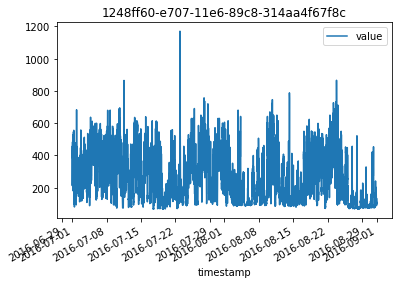

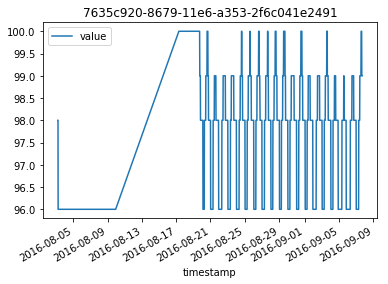

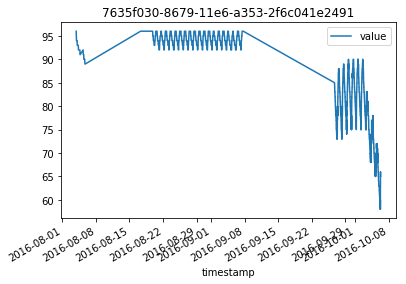

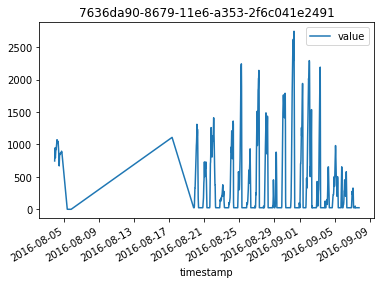

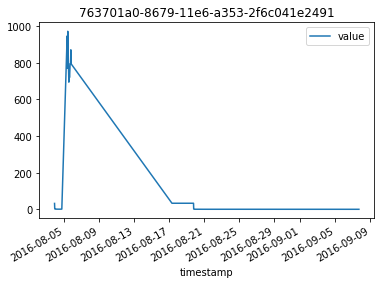

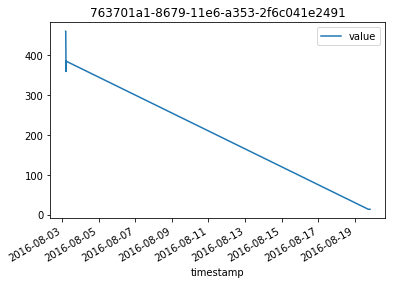

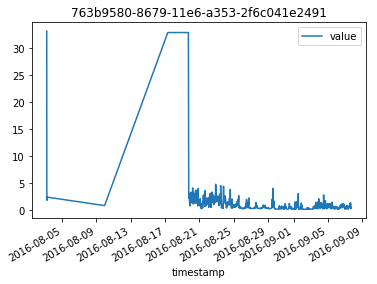

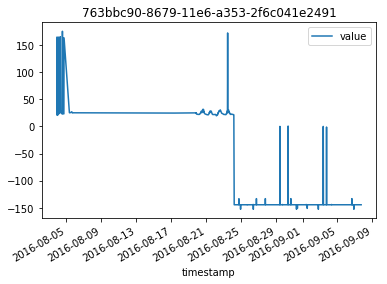

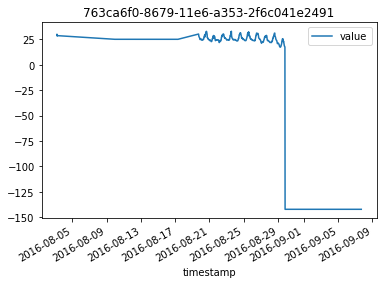

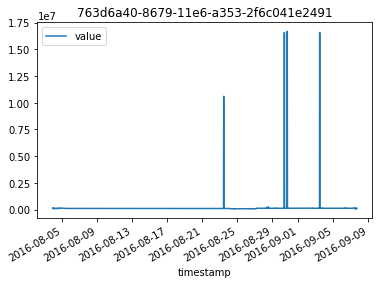

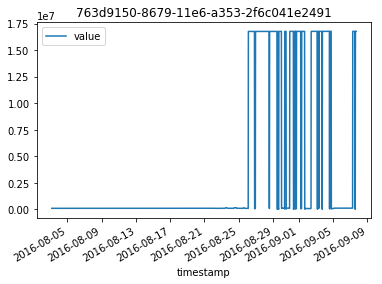

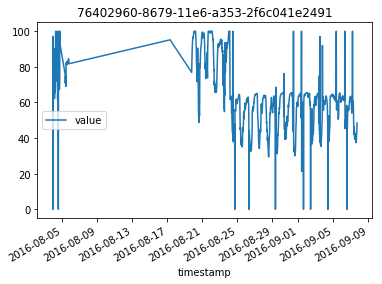

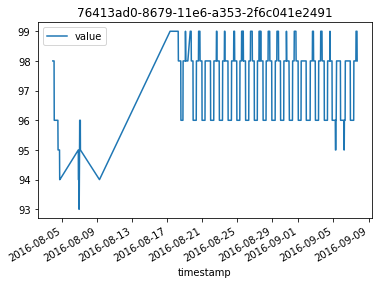

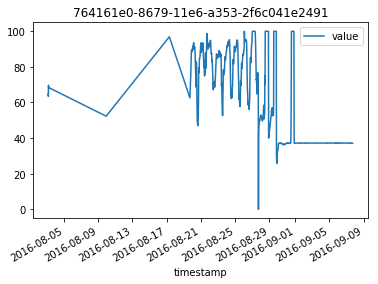

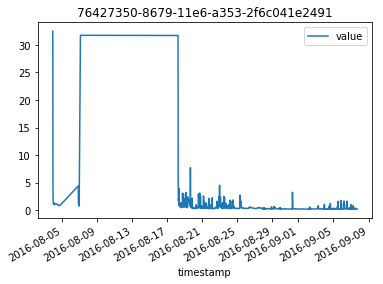

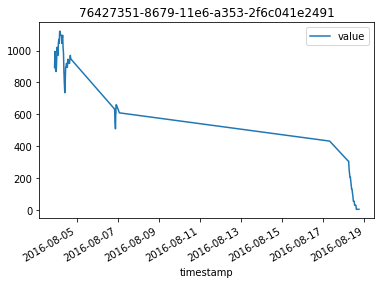

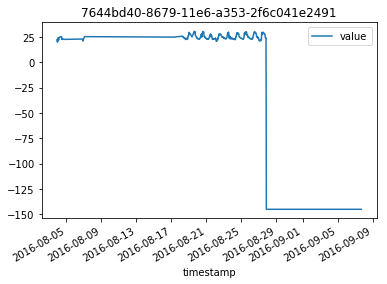

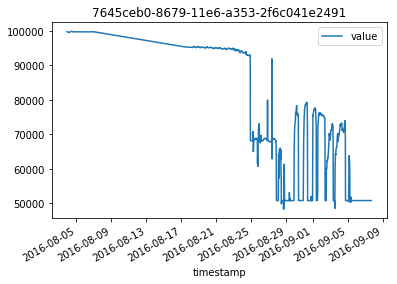

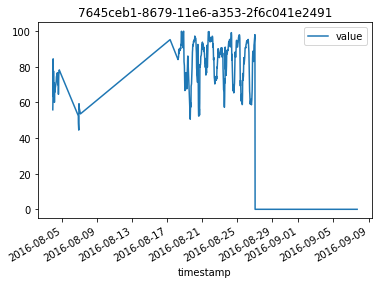

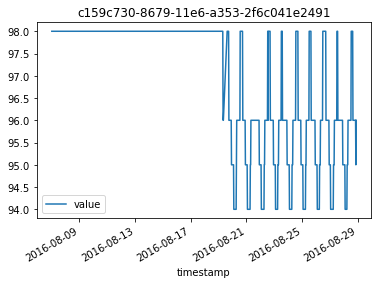

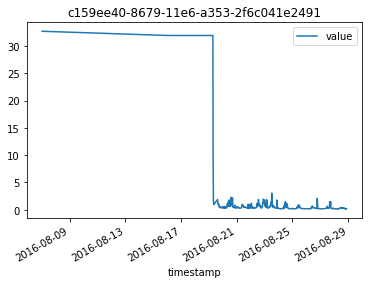

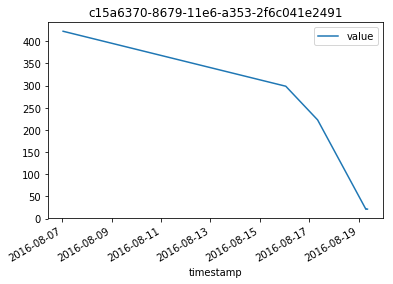

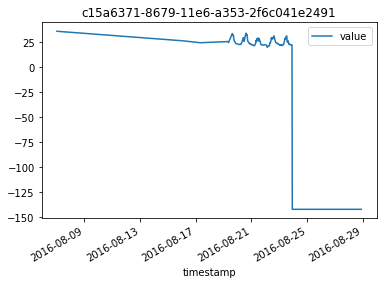

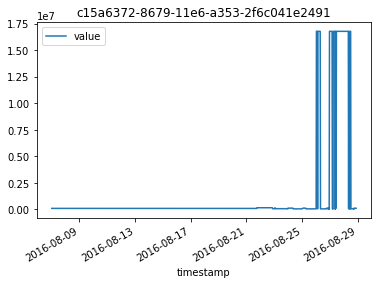

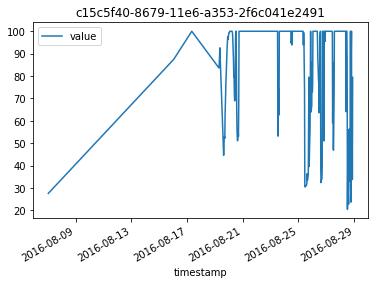

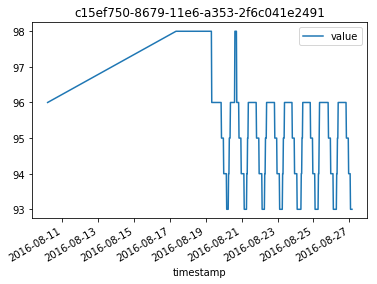

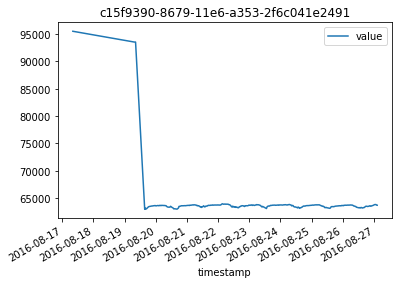

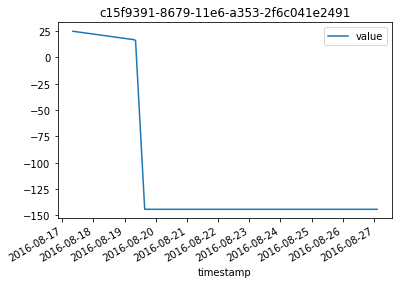

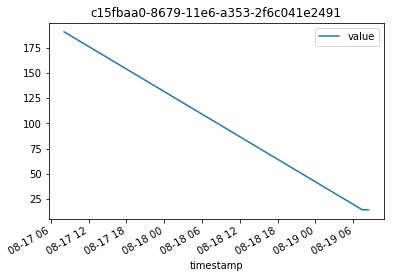

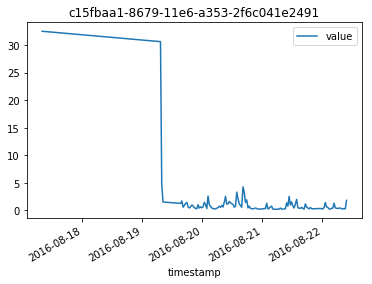

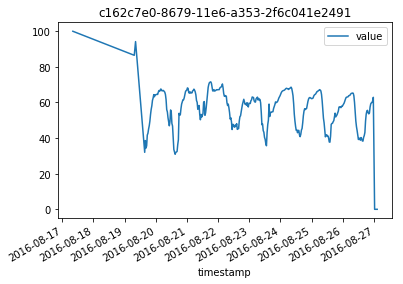

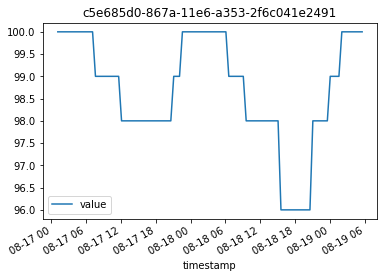

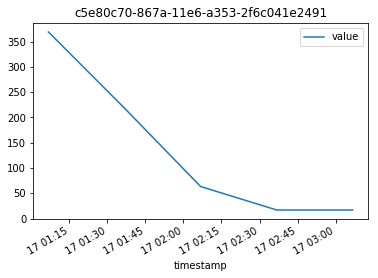

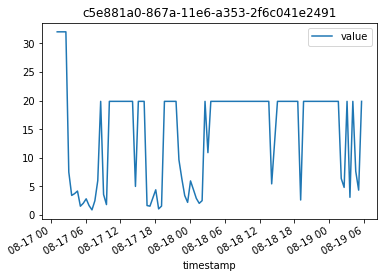

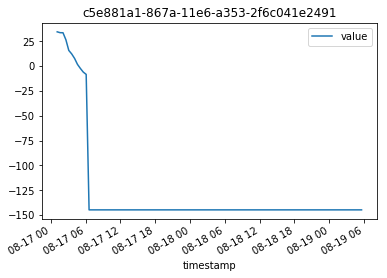

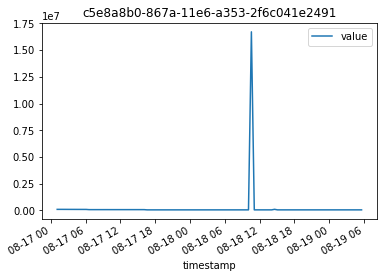

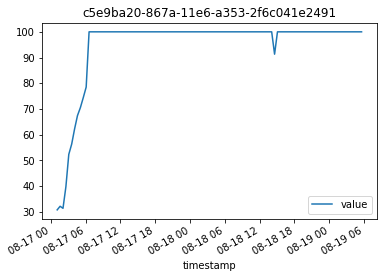

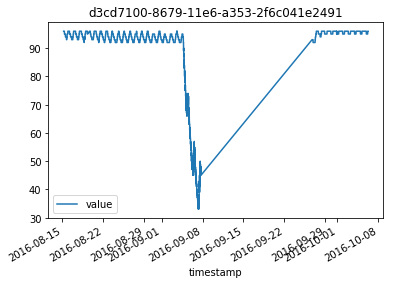

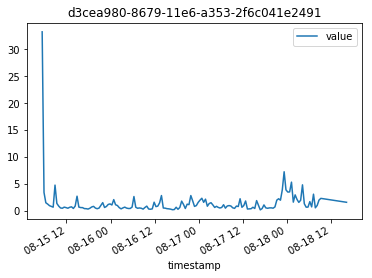

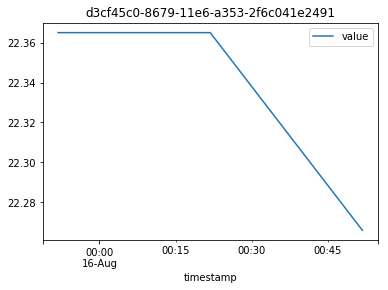

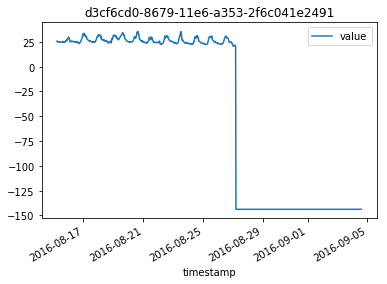

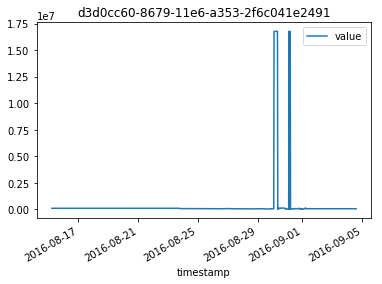

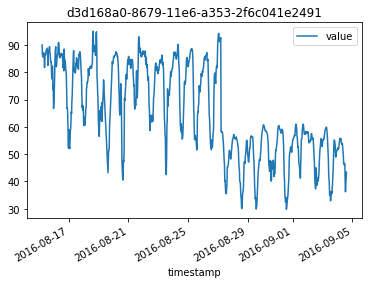

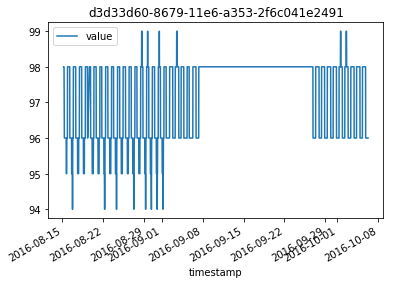

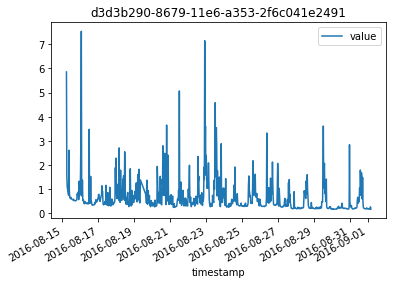

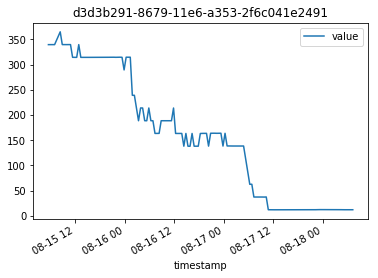

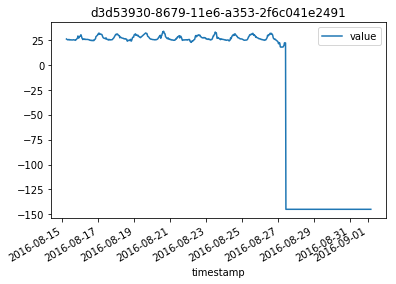

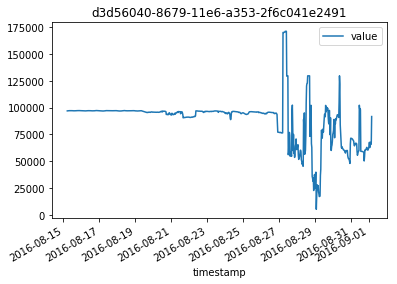

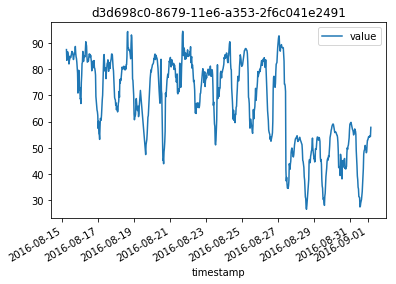

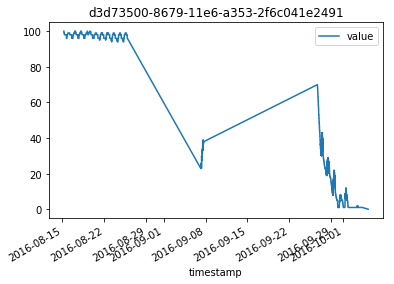

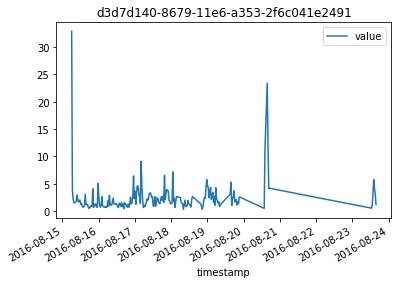

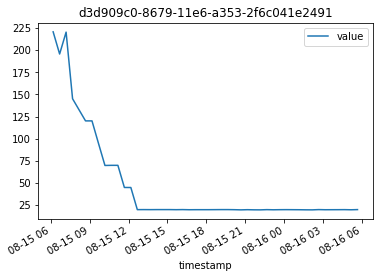

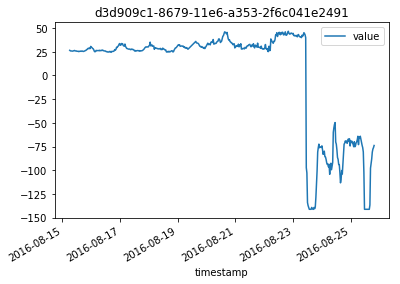

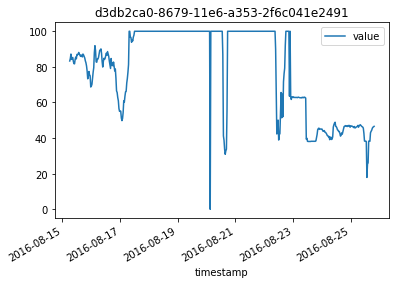

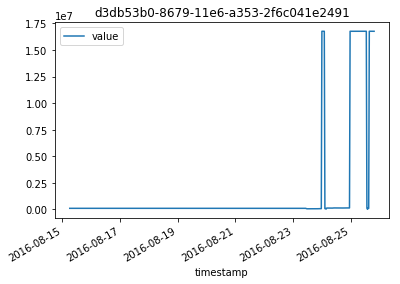

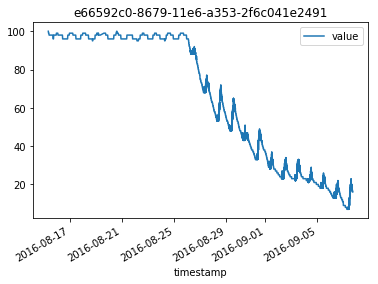

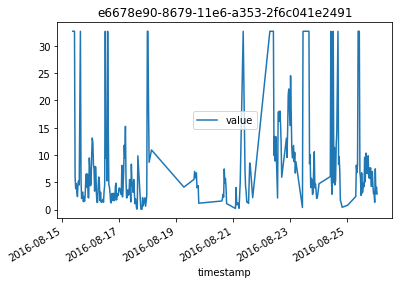

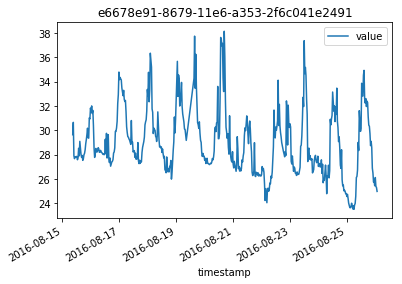

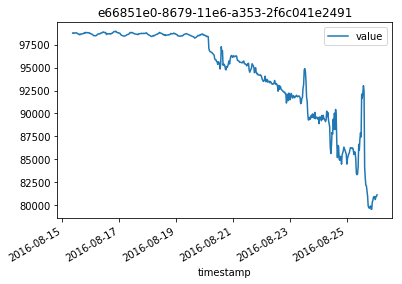

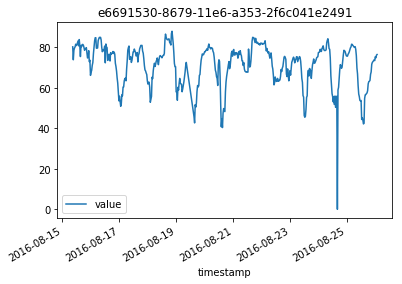

In [41]:
for i in l:
    df = full.loc[full['sensor_id'] == i]
    df.plot( y='value', title=df.iloc[0]['sensor_id'])

Sub task: Identify all the temperature sensors in the data set. Hint: These are the ones that have the string 'TCA' in their name id's

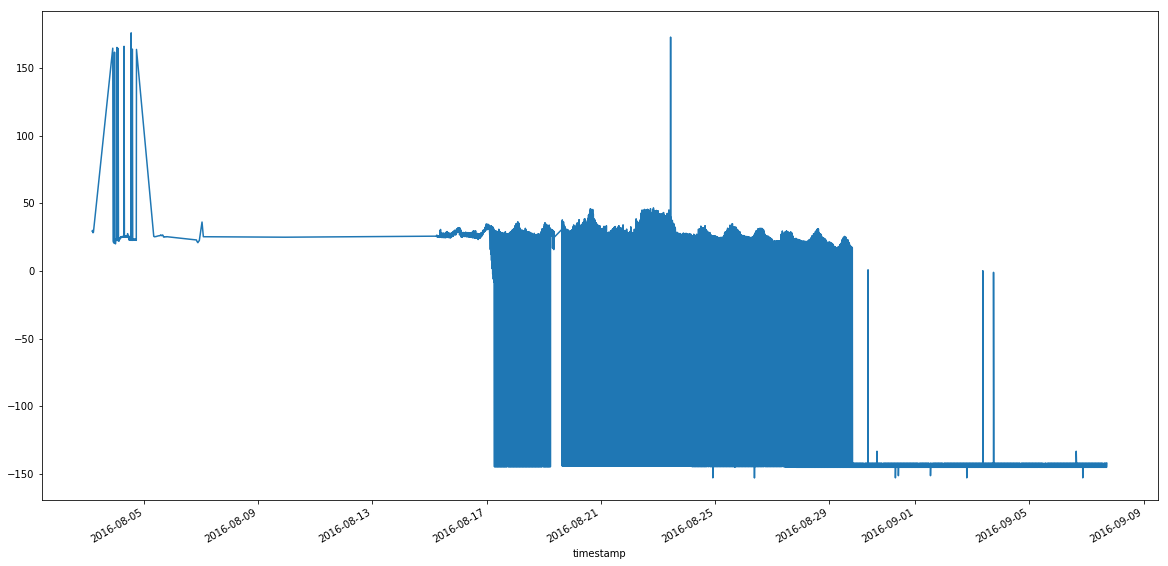

In [42]:
criteria = full.type_id == 'TCA'
plt.figure(figsize=(20,10))
full[criteria]['value'].plot()

In [43]:
temp_sensors = [s for s in full[full.type_id =='TCA']['id_x']]
temperature_senors = [s for t,s in zip(full['type_id'], full['id_x']) if t=='TCA'] # alternative way

In [44]:
temp_sensors

['763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-

** Using Pandas to plot all the temperature sensors on one single plot. **

- Use pandas to loop over each temperature sensor, and plot them one at a time.
- Hint: Use the following trick to do this is to plot one line at a time, over and over in a loop

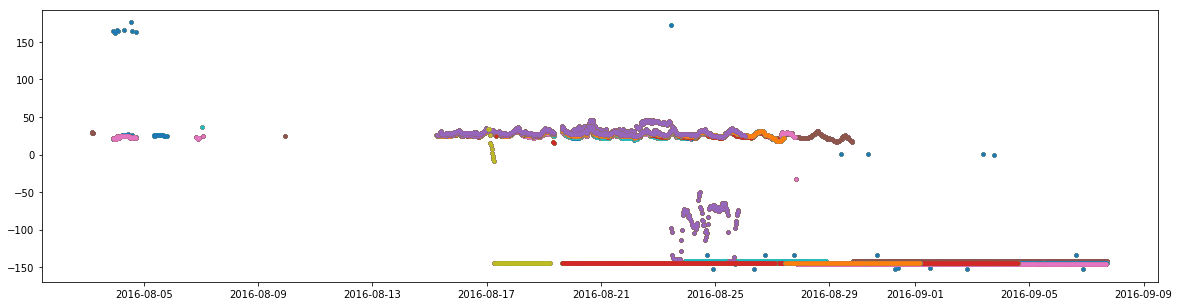

In [45]:
plt.figure(figsize=(20,5))

for s in temp_sensors:
    #print(s)
    sub_df = full[full['sensor_id']==s]
    plt.plot(sub_df.index, sub_df['value'], '.')
    

This plot is fine, but all the lines are too close together. We cannot see how each sensor is behaving. For that, we can try drawing "Subplots." In these plots, each sensor gets its own plot (called a 'panel').

**Creating Subplots - Each sensor gets its own panel**

In [46]:
df = pd.DataFrame({"temp_sensors":temp_sensors})

In [47]:
df

,temp_sensors
0,763ca6f0-8679-11e6-a353-2f6c041e2491
1,763ca6f0-8679-11e6-a353-2f6c041e2491
2,763ca6f0-8679-11e6-a353-2f6c041e2491
3,763ca6f0-8679-11e6-a353-2f6c041e2491
4,763ca6f0-8679-11e6-a353-2f6c041e2491
5,763ca6f0-8679-11e6-a353-2f6c041e2491
6,763ca6f0-8679-11e6-a353-2f6c041e2491
7,763ca6f0-8679-11e6-a353-2f6c041e2491
8,763ca6f0-8679-11e6-a353-2f6c041e2491
9,763ca6f0-8679-11e6-a353-2f6c041e2491


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6674 entries, 0 to 6673
Data columns (total 1 columns):
temp_sensors    6674 non-null object
dtypes: object(1)
memory usage: 52.2+ KB


In [49]:
grp = df.groupby(df['temp_sensors']).count()

In [50]:
grp = grp.reset_index()

In [51]:
grp

,temp_sensors
0,763bbc90-8679-11e6-a353-2f6c041e2491
1,763ca6f0-8679-11e6-a353-2f6c041e2491
2,7644bd40-8679-11e6-a353-2f6c041e2491
3,c15a6371-8679-11e6-a353-2f6c041e2491
4,c15f9391-8679-11e6-a353-2f6c041e2491
5,c5e881a1-867a-11e6-a353-2f6c041e2491
6,d3cf6cd0-8679-11e6-a353-2f6c041e2491
7,d3d53930-8679-11e6-a353-2f6c041e2491
8,d3d909c1-8679-11e6-a353-2f6c041e2491
9,e6678e91-8679-11e6-a353-2f6c041e2491


In [52]:
grp.reset_index(level=0, inplace=True)

In [53]:
grp

,index,temp_sensors
0,0,763bbc90-8679-11e6-a353-2f6c041e2491
1,1,763ca6f0-8679-11e6-a353-2f6c041e2491
2,2,7644bd40-8679-11e6-a353-2f6c041e2491
3,3,c15a6371-8679-11e6-a353-2f6c041e2491
4,4,c15f9391-8679-11e6-a353-2f6c041e2491
5,5,c5e881a1-867a-11e6-a353-2f6c041e2491
6,6,d3cf6cd0-8679-11e6-a353-2f6c041e2491
7,7,d3d53930-8679-11e6-a353-2f6c041e2491
8,8,d3d909c1-8679-11e6-a353-2f6c041e2491
9,9,e6678e91-8679-11e6-a353-2f6c041e2491


In [54]:
grpList = grp['temp_sensors'].tolist()

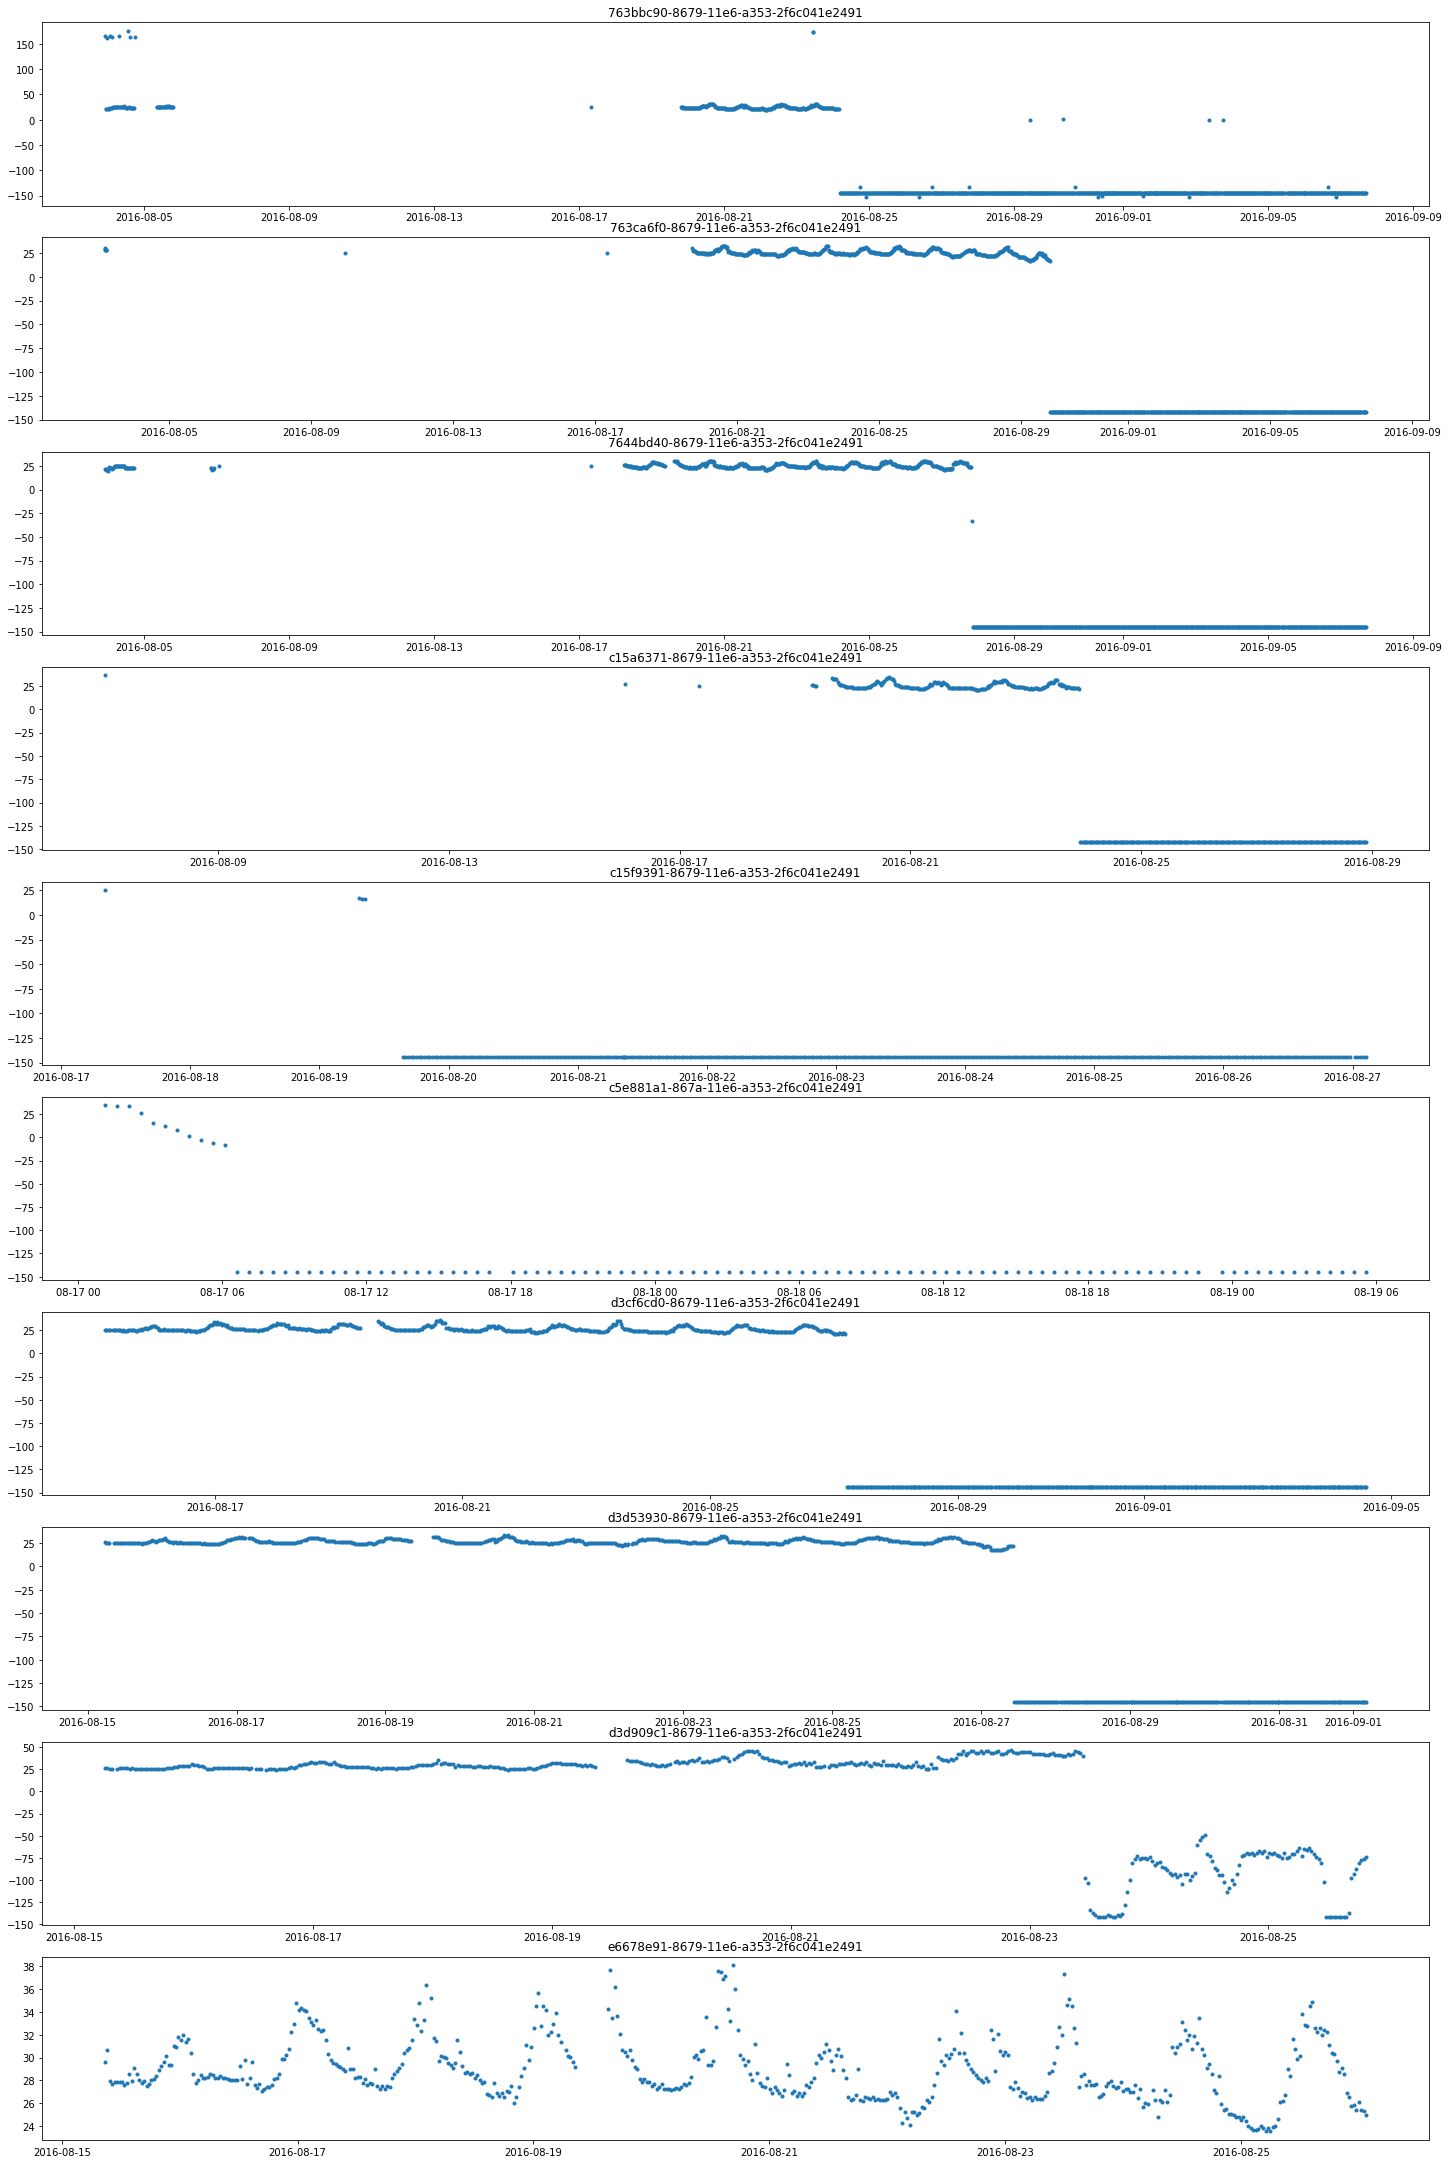

In [55]:
fig, axarr = plt.subplots(nrows=10, ncols=1, figsize=(20,20))
fig.set_size_inches(20,30) 
fig.tight_layout()

size = len(temp_sensors)-1

for i, s in zip(range(10), grpList):
        sub_df = full[full['sensor_id']==s]
        axarr[i].title.set_text(sub_df.iloc[0]['sensor_id'])
        axarr[i].plot(sub_df.index, sub_df['value'] ,'.')

plt.show()
    

**Task: Creating a reshaped Data Frame of just Temperature sensors**

For this, we are going to have each column be 1 sensor... from 1 to 10. The rows will be timestamps, as before.

Hint: pd.pivot() is perfect for this task.

In [56]:
# df.pivot(index='patient', columns='obs', values='score')

In [57]:
full = full.reset_index()

In [58]:
temp_df = full[full['sensor_id'].isin(temp_sensors)]
del temp_df['timestamp']
temp_df = temp_df.reset_index()
temp_df.pivot(columns='sensor_id', values='value')



sensor_id,763bbc90-8679-11e6-a353-2f6c041e2491,763ca6f0-8679-11e6-a353-2f6c041e2491,7644bd40-8679-11e6-a353-2f6c041e2491,c15a6371-8679-11e6-a353-2f6c041e2491,c15f9391-8679-11e6-a353-2f6c041e2491,c5e881a1-867a-11e6-a353-2f6c041e2491,d3cf6cd0-8679-11e6-a353-2f6c041e2491,d3d53930-8679-11e6-a353-2f6c041e2491,d3d909c1-8679-11e6-a353-2f6c041e2491,e6678e91-8679-11e6-a353-2f6c041e2491
0,NaN,29.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,29.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,28.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,28.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,28.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,28.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,24.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,24.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,30.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,27.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since this is a real sensor data set, there are some time stamps and sensor_id's that are repeating. (Unfortunately, this happens often in real data sets.)

**Task: Find all rows with the same [Timestamp, Sensor_id] and delete them **

**Here's a clever way to find out all the duplicated rows.**

Some Timestamp and sensor_id are repeating. That causes Indexing problems.

In [59]:
temp_df = full[full['sensor_id'].isin(temp_sensors)]
temp_df = temp_df.reset_index()

In [60]:
#pd.concat(g for _, g in df.groupby("ID") if len(g) > 1)
pd.concat(g for _, g in temp_df.groupby(['timestamp', 'sensor_id']) if len(g) > 1)

,index,timestamp,id,value,sensor_id,id_x,description,data_frequency,status,created_at,updated_at,data_type_id,node_id,id_y,type,si_unit,type_id
3683,22691,2016-08-20 20:46:05,0d35cdd0-867e-11e6-a353-2f6c041e2491,25.64,d3cf6cd0-8679-11e6-a353-2f6c041e2491,d3cf6cd0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 05:22:31+00,2016-09-30 18:12:04.58+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,d3ca3cb0-8679-11e6-a353-2f6c041e2491,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA
3686,22694,2016-08-20 20:46:05,0d34bc60-867e-11e6-a353-2f6c041e2491,25.64,d3cf6cd0-8679-11e6-a353-2f6c041e2491,d3cf6cd0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 05:22:31+00,2016-09-30 18:12:04.58+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,d3ca3cb0-8679-11e6-a353-2f6c041e2491,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA
6396,53992,2016-08-21 08:21:30,a29f50d0-867e-11e6-a353-2f6c041e2491,-144.12,c15f9391-8679-11e6-a353-2f6c041e2491,c15f9391-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-10 04:20:22+00,2016-09-29 19:20:17.516+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,c14ccee0-8679-11e6-a353-2f6c041e2491,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA
6398,53994,2016-08-21 08:21:30,a2a0b060-867e-11e6-a353-2f6c041e2491,-144.12,c15f9391-8679-11e6-a353-2f6c041e2491,c15f9391-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-10 04:20:22+00,2016-09-29 19:20:17.516+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,c14ccee0-8679-11e6-a353-2f6c041e2491,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA
6394,53990,2016-08-21 08:51:26,a2c416e0-867e-11e6-a353-2f6c041e2491,-144.12,c15f9391-8679-11e6-a353-2f6c041e2491,c15f9391-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-10 04:20:22+00,2016-09-29 19:20:17.516+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,c14ccee0-8679-11e6-a353-2f6c041e2491,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA
6397,53993,2016-08-21 08:51:26,a2c5c490-867e-11e6-a353-2f6c041e2491,-144.12,c15f9391-8679-11e6-a353-2f6c041e2491,c15f9391-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-10 04:20:22+00,2016-09-29 19:20:17.516+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,c14ccee0-8679-11e6-a353-2f6c041e2491,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA
3712,22720,2016-08-21 09:15:37,b5280940-867e-11e6-a353-2f6c041e2491,26.56,d3cf6cd0-8679-11e6-a353-2f6c041e2491,d3cf6cd0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 05:22:31+00,2016-09-30 18:12:04.58+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,d3ca3cb0-8679-11e6-a353-2f6c041e2491,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA
3713,22721,2016-08-21 09:15:37,b529de00-867e-11e6-a353-2f6c041e2491,26.56,d3cf6cd0-8679-11e6-a353-2f6c041e2491,d3cf6cd0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 05:22:31+00,2016-09-30 18:12:04.58+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,d3ca3cb0-8679-11e6-a353-2f6c041e2491,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA
3729,22737,2016-08-21 15:45:34,00267df0-867f-11e6-a353-2f6c041e2491,26.12,d3cf6cd0-8679-11e6-a353-2f6c041e2491,d3cf6cd0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 05:22:31+00,2016-09-30 18:12:04.58+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,d3ca3cb0-8679-11e6-a353-2f6c041e2491,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA
3730,22738,2016-08-21 15:45:34,0027b670-867f-11e6-a353-2f6c041e2491,26.12,d3cf6cd0-8679-11e6-a353-2f6c041e2491,d3cf6cd0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 05:22:31+00,2016-09-30 18:12:04.58+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,d3ca3cb0-8679-11e6-a353-2f6c041e2491,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA


**Task: Drop all the rows where timestamp and sensor_id are duplicated**

In [61]:
tdf = temp_df.drop_duplicates(subset = ['timestamp', 'sensor_id'], keep='first')
# Hint: Look at https://segment.com/blog/5-advanced-testing-techniques-in-go/

In [62]:
temp_df_cor = tdf.pivot(index='timestamp', columns='sensor_id', values='value')


In [63]:
daily_temp_cor_df = temp_df_cor.resample('D').mean()

Now, we are finally ready to calculate the correlations across sensor values. Hint: `Use corr()`

In [64]:
corr_df = daily_temp_cor_df.corr()

In [65]:
# Create a mask to display only the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal).
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True


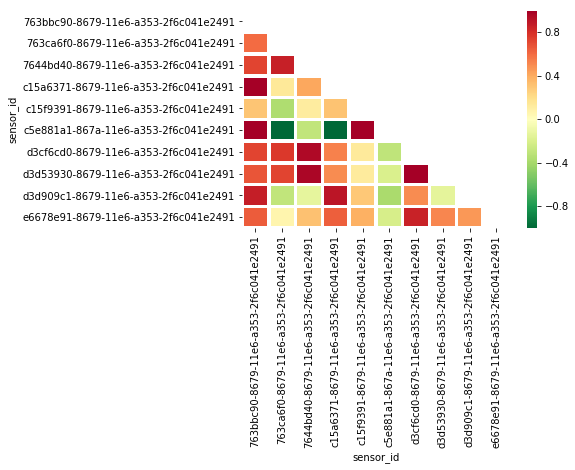

In [66]:
# Create the heatmap using seaborn library. 
# List if colormaps (parameter 'cmap') is available here: http://matplotlib.org/examples/color/colormaps_reference.html
sns.heatmap(corr_df, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
 
# Show the plot we reorient the labels for each column and row to make them easier to read.
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

In [67]:
full2 = full.drop_duplicates(subset = ['timestamp', 'sensor_id'], keep='first')

In [68]:
full_wide = full2.pivot(index='timestamp', columns='sensor_id', values='value')


In [69]:
daily_all_sensors = full_wide.resample('D').mean()

In [70]:
daily_all_sensors

sensor_id,1248ff60-e707-11e6-89c8-314aa4f67f8c,7635c920-8679-11e6-a353-2f6c041e2491,7635f030-8679-11e6-a353-2f6c041e2491,7636da90-8679-11e6-a353-2f6c041e2491,763701a0-8679-11e6-a353-2f6c041e2491,763701a1-8679-11e6-a353-2f6c041e2491,763b9580-8679-11e6-a353-2f6c041e2491,763bbc90-8679-11e6-a353-2f6c041e2491,763ca6f0-8679-11e6-a353-2f6c041e2491,763d6a40-8679-11e6-a353-2f6c041e2491,...,d3d7d140-8679-11e6-a353-2f6c041e2491,d3d909c0-8679-11e6-a353-2f6c041e2491,d3d909c1-8679-11e6-a353-2f6c041e2491,d3db2ca0-8679-11e6-a353-2f6c041e2491,d3db53b0-8679-11e6-a353-2f6c041e2491,e66592c0-8679-11e6-a353-2f6c041e2491,e6678e90-8679-11e6-a353-2f6c041e2491,e6678e91-8679-11e6-a353-2f6c041e2491,e66851e0-8679-11e6-a353-2f6c041e2491,e6691530-8679-11e6-a353-2f6c041e2491
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-07-01,306.902098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-02,267.804196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-03,286.972028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-04,339.860140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-05,445.828571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-06,391.852113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-07,305.769231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-08,368.349650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-09,265.442748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Trying to building a Linear Model**

In order to do that, we first need to create a data frame with the columns representing only those sensors for ONE NODE.

Try to see if pd.pivot() can help with grouping Nodes together

In [71]:
nodes.name # so we have 10 "nodes" with 6 sensors each. [T, Pr, HUMA, PPM , PPM2, BATT]

0       N1
1       N9
2       N8
3      N10
4       N2
5       N3
6       N7
7       N4
8       N5
9     RSAM
10      N6
Name: name, dtype: object

In [72]:
fullnode = pd.merge(full, nodes, left_on='node_id', right_on='id')

In [73]:
fullnode.columns, fullnode.index

(Index(['timestamp', 'id_x', 'value', 'sensor_id', 'id_x', 'description_x',
        'data_frequency', 'status_x', 'created_at_x', 'updated_at_x',
        'data_type_id', 'node_id', 'id_y', 'type', 'si_unit', 'type_id', 'id_y',
        'name', 'description_y', 'location', 'status_y', 'created_at_y',
        'updated_at_y', 'volcano_id'],
       dtype='object'),
 Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                 9,
             ...
             63446, 63447, 63448, 63449, 63450, 63451, 63452, 63453, 63454,
             63455],
            dtype='int64', length=63456))

In [74]:
fullnode.set_index('timestamp', inplace=True)

In [75]:
fullnode.resample('D').mean()

,value,data_frequency
timestamp,,
2016-07-01,306.902098,1800000.0
2016-07-02,267.804196,1800000.0
2016-07-03,286.972028,1800000.0
2016-07-04,339.860140,1800000.0
2016-07-05,445.828571,1800000.0
2016-07-06,391.852113,1800000.0
2016-07-07,305.769231,1800000.0
2016-07-08,368.349650,1800000.0
2016-07-09,265.442748,1800000.0


In [76]:
# fullnode.pivot_table(index=['timestamp', 'name'], columns='type', values='value')
fn_wide = fullnode.pivot_table(index=['timestamp','name'], columns=['type'], values='value')


In [77]:
#Now, let's make the Node ('name') into its own column. We do this by reset_index() for that level (=1)
fn_wide.reset_index(level=1, inplace=True)

In [78]:
fn_wide.head()

type,name,RSAM,battery,carbon dioxide concentration,humidity,hydrogen sulfide concentration,pressure,temperature
timestamp,,,,,,,,
2016-07-01 00:00:31,RSAM,455.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:10:02,RSAM,213.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:20:00,RSAM,225.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:30:01,RSAM,321.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:40:00,RSAM,429.0,NaN,NaN,NaN,NaN,NaN,NaN


Before we can perform Linear Regression, we have one last step remaining. We'd like to "resample" all the data, aggregating it down to 'Daily' Levels.

In [79]:
lmfn = fn_wide.resample('D').mean()

In [80]:
lmfn.shape

(98, 7)

In [81]:
lmfn

type,RSAM,battery,carbon dioxide concentration,humidity,hydrogen sulfide concentration,pressure,temperature
timestamp,,,,,,,
2016-07-01,306.902098,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-02,267.804196,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-03,286.972028,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-04,339.860140,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-05,445.828571,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-06,391.852113,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-07,305.769231,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-08,368.349650,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-09,265.442748,NaN,NaN,NaN,NaN,NaN,NaN


### End of Stitching. 

**The Digital Thread for this dataset has been created**

This "digital Thread" has been used to 'stitch' the data frame with all the values we wish to analyze.

---
Now we finally have the data frame in the shape we wanted to enable Linear Regression.

### 8.0 Sample Modeling

**8.1 Building A Battery Remaining-Life prediction model **
Build a machine learning model (LR, tree-based or any other) to try and predict the Battery life (remaining) as a function of any of the other sensor characteristic.

* Which variable (sensor) is a good predictor of battery life?
* Is your linear regression a "good fit?"
* What it the RMSE of your predicted values?

In [82]:
lmfn.isnull().sum()

type
RSAM                              36
battery                           56
carbon dioxide concentration      69
humidity                          68
hydrogen sulfide concentration    68
pressure                          68
temperature                       68
dtype: int64

<font color=green> The lmfn dataframe contains a lot of NAN values and ultimately cleaning this results in an empty dataframe and NAN containing dataframe cannot be trained with ML
    </font>

In [83]:
#==============================================================================
# Supervised learning linear regression
#==============================================================================

from sklearn import linear_model

# Split the data into training/testing sets
train = lmfn[:-30]
test = lmfn[-30:]

In [84]:
train.columns

Index(['RSAM', 'battery', 'carbon dioxide concentration', 'humidity',
       'hydrogen sulfide concentration', 'pressure', 'temperature'],
      dtype='object', name='type')

In [85]:
target, predictors = 'battery', 'temperature'

x_train=train[predictors].to_frame() #converts the pandas Series to numpy.ndarray
y_train=train[target].to_frame()
x_test=test[predictors].to_frame() #converts the pandas Series to numpy.ndarray
y_test=test[target].to_frame()

In [86]:
# 2.- Create linear regression object
regr = linear_model.LinearRegression()

# 3.- Train the model using the training sets
regr.fit(x_train,y_train)

# The coefficients
print("Coefficients: ",  float(regr.coef_))
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(x_train) - y_train) ** 2))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').